In [1]:
#for running on python anywhere
import os
from os.path import exists
####################you will need to change some paths here!#####################
#output files
filename_out_nc='F:/data/cruise_data/saildrone/baja-2018/daily_files/sd-1002/saildrone-gen_4-baja_2018-EP-sd1002-ALL-1_min-v1.nc'
#F:/data/cruise_data/saildrone/baja-2018/data_so_far.kml'
#################################################################################
import xarray as xr
from datetime import datetime, timedelta
#import BeautifulSoup as BeautifulSoup
from bs4 import BeautifulSoup
import requests
def listFD(url, ext=''):
    page = requests.get(url).text
    #print(page)
    soup = BeautifulSoup(page, 'html.parser')
    return [url + node.get('href') for node in soup.find_all('a') if (node.get('href').endswith(ext) and node.get('href').startswith('2'))]


In [16]:
drop_list=['quality_level','or_number_of_pixels','dt_analysis','satellite_zenith_angle','sses_bias'  ,
           'sses_standard_deviation','wind_speed','sst_dtime','l2p_flags']
for incr_day in range(0,1): #61):
    d = datetime(2018,4,11) + timedelta(days=incr_day)
    day_of_year = d.timetuple().tm_yday
    url = 'https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/' \
            + str(d.year) + '/' + str(day_of_year).zfill(3) + '/'
    ext = 'nc'
    filenames=listFD(url, ext)
    ilen=len(filenames)
    ds_new=[]
    for ic in range(0,ilen):
        file = filenames[ic]
        print(file)
        ds=xr.open_dataset(file,drop_variables=drop_list)
        ds2=ds.sel(dict(lon=slice(-130,-110),lat=slice(42,23)))
        if ds2.sea_surface_temperature.max()>10:
            ds_new.append(ds2)
        ds.close()
    combined = xr.concat(ds_new, dim='time')
    mn=combined.sea_surface_temperature.mean(dim='time')
    mn.to_netcdf('./data/sst'+str(day_of_year)+'.nc')
    combined.to_netcdf('./data/all_sst'+str(day_of_year)+'.nc')

https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411000000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411001000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411002000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411003000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411004000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/

https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411073000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411074000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411075000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411080000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411081000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/

https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411150000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411151000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411152000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411153000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411154000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/

https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411223000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411224000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411225000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411230000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411231000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc
https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/

In [18]:
combined = xr.concat(ds_new, dim='time')
combined

<xarray.Dataset>
Dimensions:                  (lat: 950, lon: 1000, time: 4)
Coordinates:
  * lon                      (lon) float32 -129.99 -129.97 ... -110.03 -110.01
  * lat                      (lat) float32 41.99 41.97 41.95 ... 23.03 23.010002
  * time                     (time) object 2018-04-11 09:20:00 ... 2018-04-11 22:20:01
Data variables:
    sea_surface_temperature  (time, lat, lon) float32 nan nan nan ... nan nan
Attributes:
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    SSTs are a weighted average of the SSTs of co...
    creator_email:              Alex.Ignatov@noaa.gov
    creator_name:               Alex Ignatov
    creator_url:                http://www.star.nesdis.noaa.gov
    date_created:               20180411T113701Z
    easternmost_longitude:      -87.54
    f

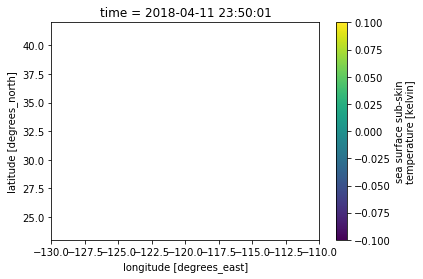

In [15]:
ds2.sea_surface_temperature.plot()
if ds2.sea_surface_temperature.max()>10:
    print('hi')


https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411051000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc


OSError: [Errno -37] NetCDF: Write to read only: b'https://opendap.jpl.nasa.gov/opendap/OceanTemperature/ghrsst/data/GDS2/L3U/VIIRS_NPP/OSPO/v2.41/2018/101/20180411051000-OSPO-L3U_GHRSST-SSTsubskin-VIIRS_NPP-ACSPO_V2.41-v02.0-fv01.0.nc'